# 1. Read the dataset to the python environment.

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_excel("iriss.xls")
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [242]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [243]:
df.nunique()

SL                35
SW                23
PL                43
PW                22
Classification     3
dtype: int64

In [244]:
df.describe

<bound method NDFrame.describe of       SL   SW   PL   PW  Classification
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    NaN  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  NaN  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 2.Do necessary pre-processing steps

In [246]:
df.Classification.value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

Filling the missing values with median

In [247]:

df["SL"]= df["SL"].fillna(df["SL"].median() )

In [248]:
df["SW"]= df["SW"].fillna(df["SW"].median() )

In [249]:
df["PL"] = df["PL"].fillna(df["PL"].median())

In [250]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<AxesSubplot:xlabel='Classification', ylabel='SL'>

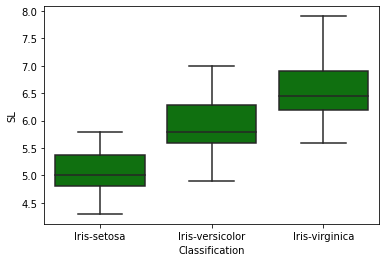

In [251]:
sns.boxplot(y='SL', x='Classification', data=df, color='green')

<AxesSubplot:xlabel='Classification', ylabel='SW'>

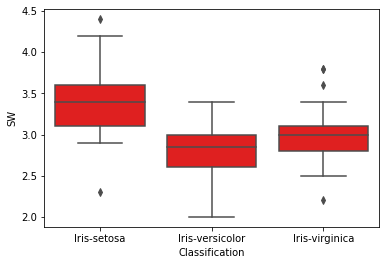

In [252]:
sns.boxplot(y='SW', x='Classification', data=df,color="red")

<AxesSubplot:xlabel='Classification', ylabel='PW'>

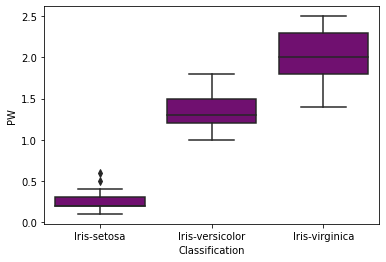

In [253]:
sns.boxplot(y='PW', x="Classification", data=df, color="purple")

<AxesSubplot:xlabel='Classification', ylabel='PL'>

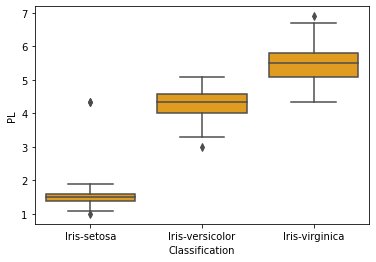

In [254]:
sns.boxplot(y="PL", x="Classification", data=df , color="orange")

We can leave the outliers, because the dataset is very small. the removal of outliers may effect the dataset

In [255]:
y=pd.DataFrame(df['Classification'])

In [256]:
x=df.drop(['Classification'],axis=1)

In [257]:
from sklearn.preprocessing import LabelEncoder
labelenc=LabelEncoder()
cl=['Classification']
for i in np.arange(len(cl)):
    y[cl[i]]=labelenc.fit_transform(y[cl[i]])

In [258]:
y.head()

,Classification
0,0
1,0
2,0
3,0
4,0


# Importing the libraries for splitting the dataset into training and testing data.

In [259]:
from sklearn.model_selection import train_test_split

In [260]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=.25)

In [261]:
x_train.shape

(112, 4)

In [262]:
x_test.shape

(38, 4)

In [263]:
y_train.shape

(112, 1)

In [264]:
y_test.shape

(38, 1)

# 3. Find out which classification model gives the best result to predict irisspecies.(also do random forest algorithm)

In [265]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score
from sklearn.ensemble import RandomForestClassifier

# Random forest

In [266]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [267]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',f1_score(y_test, y_pred,average='micro'))
print('Accuracy :',accuracy_score(y_test,y_pred))

Confusion matrix : 
 [[16  0  0]
 [ 0 10  1]
 [ 0  0 11]]
F1_score : 0.9736842105263158
Accuracy : 0.9736842105263158


# Logistic Regression Model

In [268]:
logi=LogisticRegression()
logi.fit(x_train,y_train)
y_pred1=logi.predict(x_test)

In [269]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,recall_score,precision_score
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred1))
print('F1_score :',f1_score(y_test,y_pred1,average='micro'))
print('Accuracy :',accuracy_score(y_test,y_pred1)) 
print('Recall :',recall_score(y_test,y_pred1,average='micro'))
print('Precision :',precision_score(y_test,y_pred1,average='micro'))

Confusion matrix : 
 [[15  1  0]
 [ 0 10  1]
 [ 0  0 11]]
F1_score : 0.9473684210526315
Accuracy : 0.9473684210526315
Recall : 0.9473684210526315
Precision : 0.9473684210526315


# Decision Tree Model

In [270]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred2=dt_model.predict(x_test)

In [271]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred2))
print('F1_score :',f1_score(y_pred2, y_test,average='micro'))
print('Accuracy :',accuracy_score(y_test,y_pred2)) 

Confusion matrix : 
 [[16  0  0]
 [ 0 10  1]
 [ 0  1 10]]
F1_score : 0.9473684210526315
Accuracy : 0.9473684210526315


# Gradient Boosting Classifier Model

In [272]:
from sklearn.ensemble import GradientBoostingClassifier

In [273]:
grad = GradientBoostingClassifier()
grad.fit(x_train,y_train)
ypred3 = grad.predict(x_test)

print( "accuracy",accuracy_score(y_test, ypred3))
print("\nThe accuracy score for GradientBoostingClassifier Model is : ", accuracy_score(y_test,ypred3))
print("The f1 score is : ", f1_score(y_test,ypred3,average="micro"))
print(" The confusion matrix is  ", confusion_matrix(y_test,ypred3))

accuracy 0.9473684210526315

The accuracy score for GradientBoostingClassifier Model is :  0.9473684210526315
The f1 score is :  0.9473684210526315
 The confusion matrix is   [[16  0  0]
 [ 0 10  1]
 [ 0  1 10]]


# SVM Radial

In [274]:
from sklearn.svm import SVC

In [275]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred4=svm_radial.predict(x_test)
print( "accuracy",accuracy_score(y_test, y_pred4))

accuracy 0.9473684210526315


# KNN

In [276]:
from sklearn.neighbors import KNeighborsClassifier

In [277]:

from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
acc_values

[0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9473684210526315,
 0.9736842105263158,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9736842105263158,
 0.9736842105263158,
 0.9473684210526315,
 0.9473684210526315]

Text(0, 0.5, 'Accuracy')

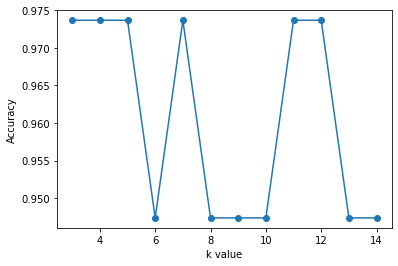

In [278]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [282]:
cclassifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [283]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',f1_score(y_test,y_pred,average='micro'))
print('Accuracy :',accuracy_score(y_test,y_pred)) 
print('Recall :',recall_score(y_test,y_pred,average='micro'))
print('Precision :',precision_score(y_test,y_pred,average='micro'))

Confusion matrix : 
 [[15  1  0]
 [ 0 10  1]
 [ 0  0 11]]
F1_score : 0.9473684210526315
Accuracy : 0.9473684210526315
Recall : 0.9473684210526315
Precision : 0.9473684210526315


In [284]:
# Feature importance
feature_imp=pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100
feature_imp

PW    50.097602
PL    36.563555
SL     8.619422
SW     4.719421
dtype: float64

After Studying the above data which we obtained, we can say all the Models are performing relatively well. 

one model give the best result, Random forest model.